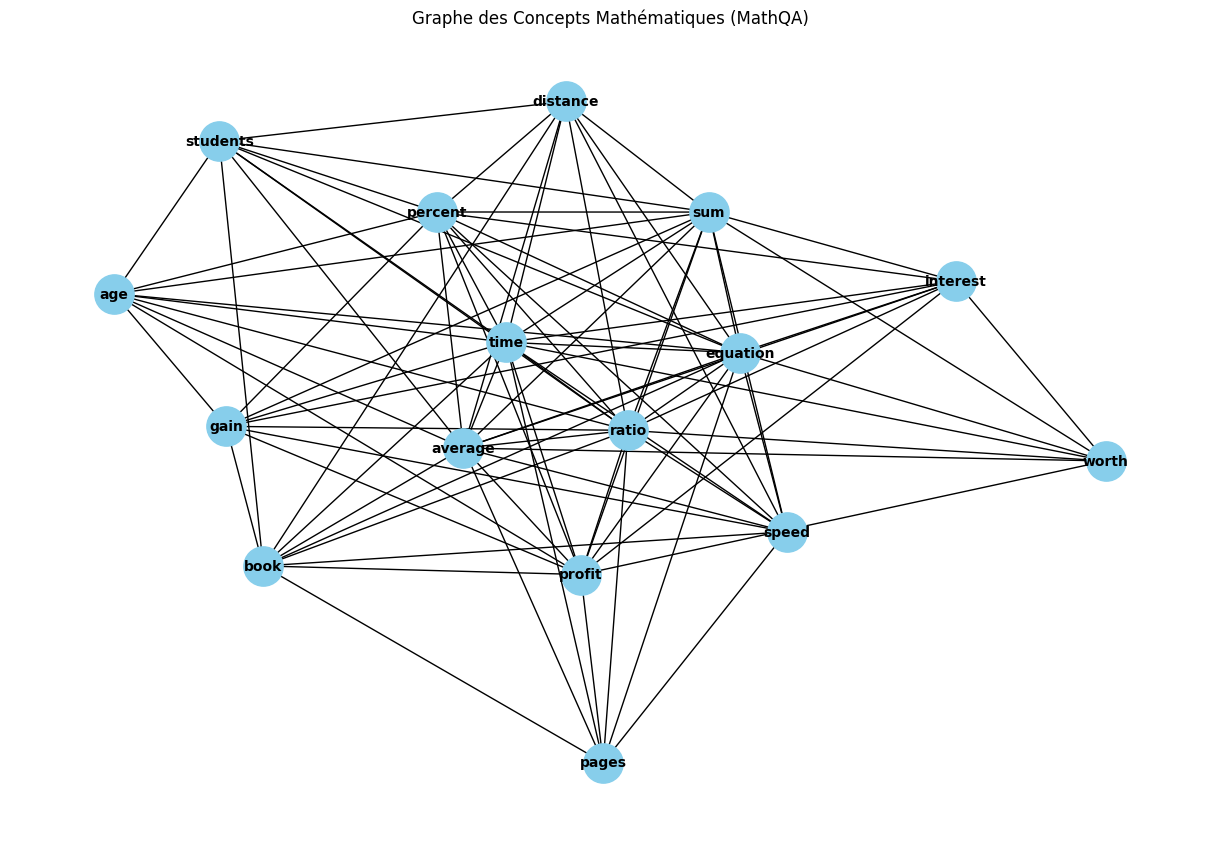

Graphe généré et sauvegardé sous le nom 'concept_graph.graphml'.


In [10]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import re

# Charger les données du fichier train.json
with open('../ProjetLlms/MathQA/train.json', 'r') as f:
    data = json.load(f)

# Initialiser le graphe
G = nx.Graph()

# Fonction pour extraire les concepts mathématiques des problèmes et explications
def extract_concepts(text):
    # Expressions régulières pour identifier des concepts mathématiques clés
    keywords = re.findall(r'\b(\w+)\b', text.lower())
    math_keywords = [
        "gain", "average", "sum", "age", "percent", "time", "students", "pages", 
        "distance", "speed", "interest", "worth", "ratio", "equation", "book", "profit"
    ]
    concepts = [word for word in keywords if word in math_keywords]
    return list(set(concepts))

# Ajouter les noeuds et relations dans le graphe
for item in data:
    problem = item["Problem"]
    rationale = item["Rationale"]
    category = item["category"]

    # Extraire les concepts des problèmes et explications
    problem_concepts = extract_concepts(problem)
    rationale_concepts = extract_concepts(rationale)
    
    # Ajouter les concepts comme noeuds
    for concept in problem_concepts + rationale_concepts:
        G.add_node(concept, label=concept, category=category)

    # Ajouter des arêtes entre les concepts
    for i, concept1 in enumerate(problem_concepts):
        for concept2 in rationale_concepts:
            if concept1 != concept2:
                G.add_edge(concept1, concept2, label=category)

# Visualisation du graphe
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Graphe des Concepts Mathématiques (MathQA)')
plt.show()

# Sauvegarder le graphe
nx.write_graphml(G, "concept_graph.graphml")

print("Graphe généré et sauvegardé sous le nom 'concept_graph.graphml'.")
